In [27]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import cuts
from networkx.algorithms import community

In [28]:
# Load dữ liệu từ file edges
edges_path = "/content/drive/MyDrive/dulieu/MangXaHoi/DoAnCuoiKy/edges.csv"

# Đọc dữ liệu edges
edges = pd.read_csv(edges_path)

# Tạo đồ thị từ dữ liệu
G = nx.Graph()

# Thêm các cạnh vào đồ thị
for _, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

"""
Các metrics chính trong phân tích cộng đồng mạng:

**Modularity**

Ý nghĩa: Đo độ mạnh của cấu trúc cộng đồng

Phạm vi: [-1, 1]

Giá trị tốt: > 0.3
Càng cao càng tốt

**Conductance**

Ý nghĩa: Tỷ lệ kết nối ra bên ngoài cộng đồng

Phạm vi: [0, 1]
Giá trị tốt: < 0.3
Càng thấp càng tốt


**Internal Density**

Ý nghĩa: Mật độ kết nối trong cộng đồng

Phạm vi: [0, 1]
Giá trị tốt: > 0.7
Càng cao càng tốt


**Ratio Cut**

Ý nghĩa: Đo tỷ lệ giữa cạnh cắt và kích thước tập node

Phạm vi: [0, ∞)
Giá trị tốt: càng thấp càng tốt
Cân bằng giữa kích thước và số cạnh cắt


**Normalized Cut**

Ý nghĩa: Phiên bản chuẩn hóa của ratio cut theo volume

Phạm vi: [0, 2]
Giá trị tốt: càng thấp càng tốt

Cân bằng volume giữa các cộng đồng


**Volume**

Ý nghĩa: Tổng bậc của các node trong cộng đồng

Phạm vi: [0, 2|E|]
Dùng để đánh giá kích thước cộng đồng


**Edges Cut**

Ý nghĩa: Số cạnh kết nối ra ngoài cộng đồng

Phạm vi: [0, |E|]
Càng thấp càng tốt
Đo mức độ tách biệt của cộng đồng
"""

In [29]:
# Tìm cộng đồng bằng thuật toán Girvan-Newman
communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
# Tạo một danh sách rỗng để lưu trữ các giá trị k và modularity
modularity_data = []

for k in range(len(communities)-2):
    community_modularity = nx.community.modularity(G, communities[k])
    modularity_data.append((k+1, community_modularity))

# Tạo DataFrame từ danh sách k và modularity
modularity_df = pd.DataFrame(modularity_data, columns=['k', 'Modularity'])
print(modularity_df)

     k  Modularity
0    1   -0.000006
1    2   -0.000057
2    3    0.000209
3    4    0.000793
4    5    0.000723
5    6    0.000820
6    7    0.000625
7    8    0.000748
8    9    0.000481
9   10    0.000532
10  11    0.000914
11  12    0.000507
12  13    0.000414
13  14    0.000636
14  15    0.001301
15  16    0.002199
16  17    0.001871
17  18    0.001720
18  19    0.001717
19  20    0.002040
20  21    0.001638
21  22    0.001402
22  23    0.001557
23  24    0.001634
24  25    0.002380
25  26    0.001650
26  27    0.000730
27  28    0.000189
28  29   -0.000014
29  30    0.000041
30  31    0.000331
31  32    0.000649
32  33    0.001466
33  34   -0.001095
34  35   -0.002657
35  36   -0.004211
36  37   -0.006663
37  38   -0.008942
38  39   -0.009561
39  40   -0.010138
40  41   -0.010602
41  42   -0.012756
42  43   -0.013947
43  44   -0.015947
44  45   -0.017774
45  46   -0.019429
46  47   -0.020911
47  48   -0.021931
48  49   -0.023284
49  50   -0.024464
50  51   -0.025471
51  52   -0.

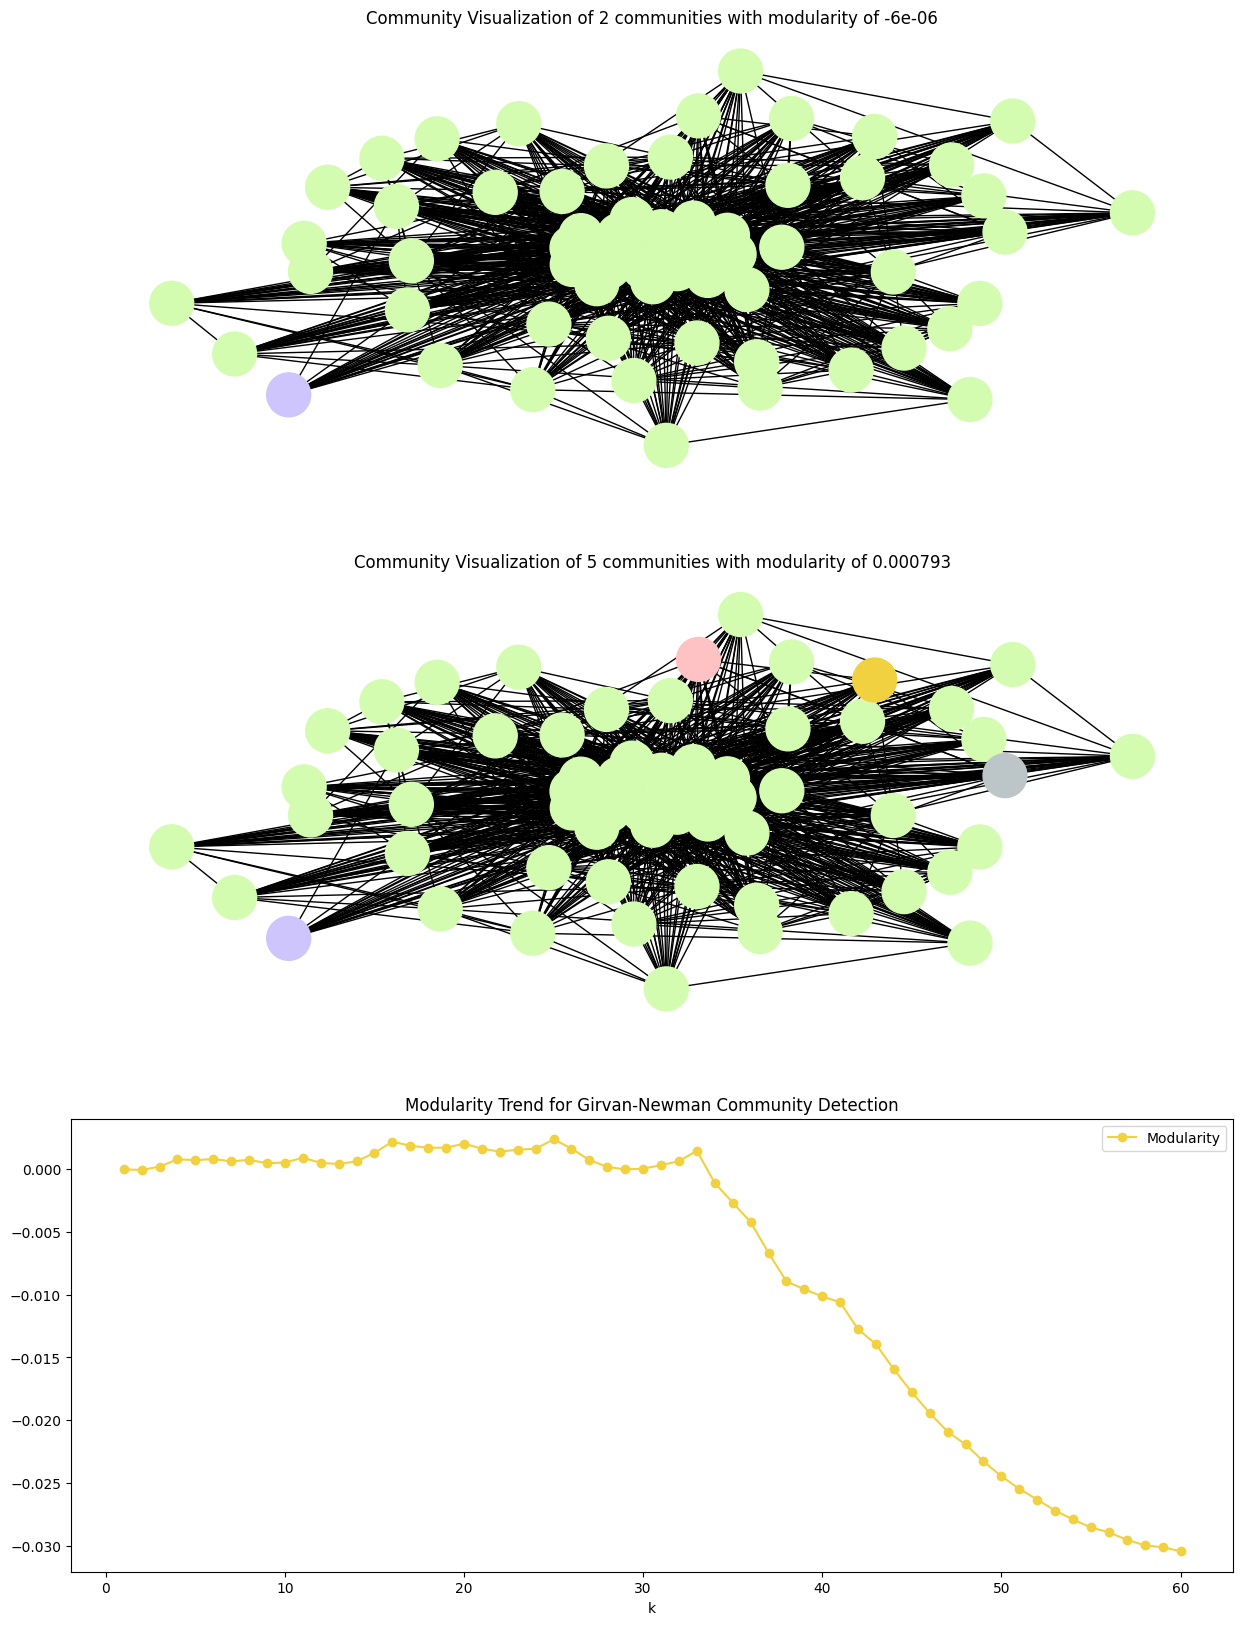

In [30]:
# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities)
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=False,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)
# Plot change in modularity as the important edges are removed (using line chart)
#fig, ax = plt.subplots(3, figsize=(15, 20))

modularity_df.plot.line(
    x="k",
    y="Modularity",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
    marker='o',  # Thêm dấu chấm tại mỗi điểm trên đường
)

plt.show()

Phát hiện cộng đồng bằng Louvain...
Phát hiện cộng đồng bằng Girvan-Newman...
Phát hiện cộng đồng bằng Label Propagation...
Trực quan hóa các cộng đồng...
So sánh các chỉ số giữa các thuật toán...


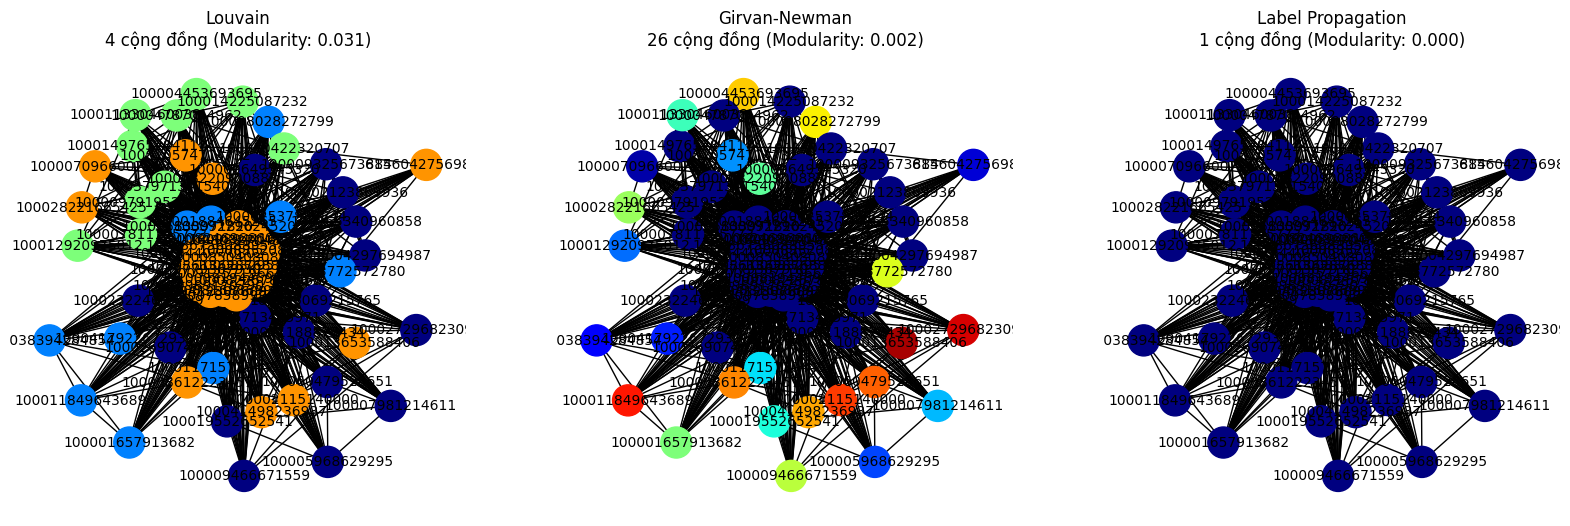

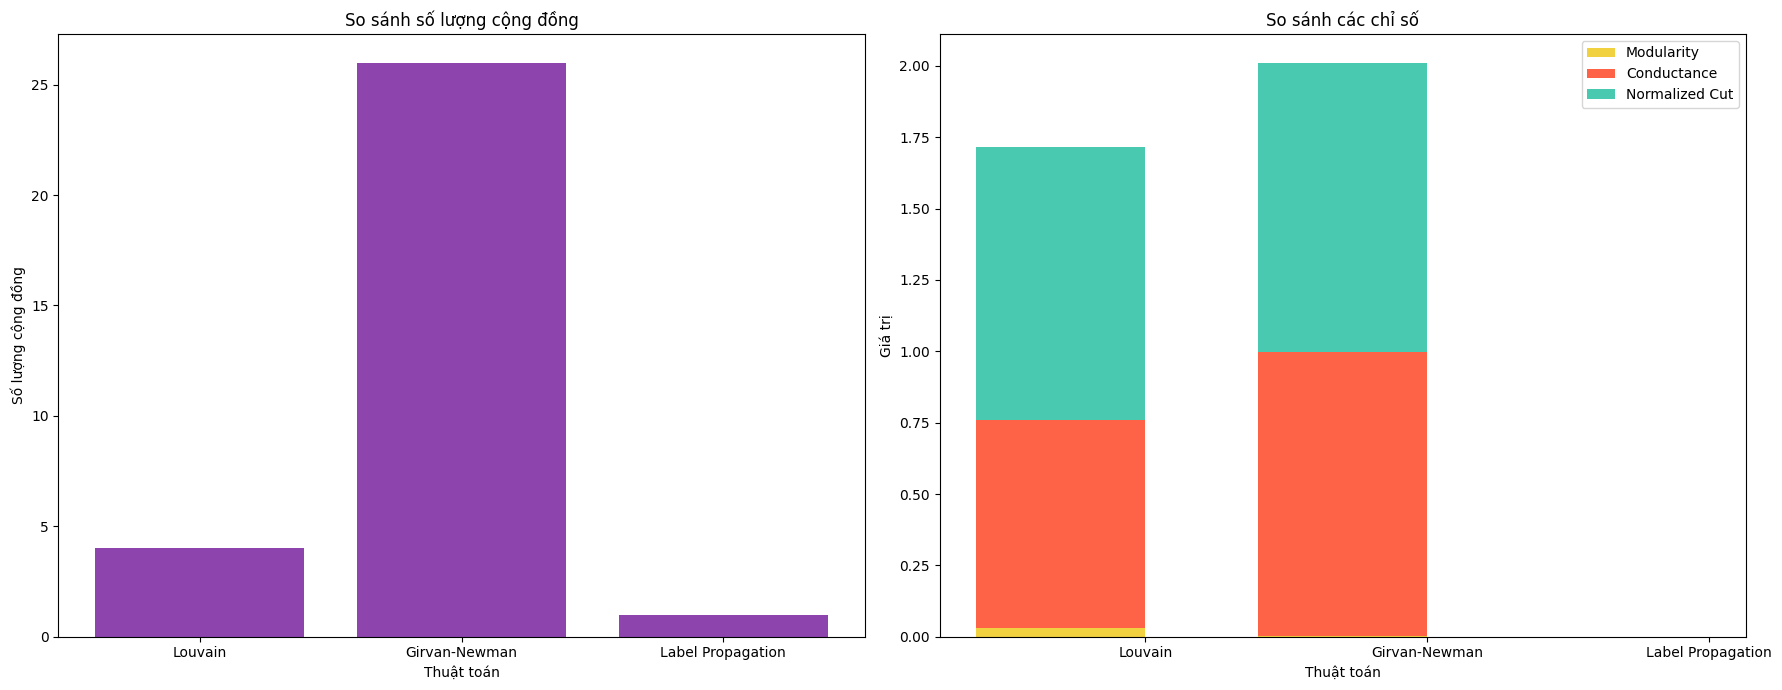

           Algorithm  Num Communities  Modularity  Conductance  Normalized Cut
0            Louvain                4    0.030933     0.728128        0.955599
1      Girvan-Newman               26    0.002380     0.993972        1.015618
2  Label Propagation                1    0.000000     0.000000        0.000000


In [31]:

class CommunityAnalysis:
    def __init__(self, graph):
        self.graph = graph
        self.partitions = {}

    def detect_communities_louvain(self):
        """Phát hiện cộng đồng bằng phương pháp Louvain."""
        self.partitions['Louvain'] = list(community.louvain_communities(self.graph))
        return self.partitions['Louvain']

    def detect_communities_girvan_newman(self):
        """Phát hiện cộng đồng bằng phương pháp Girvan-Newman."""
        girvan_newman_generator = community.girvan_newman(self.graph)
        self.partitions['Girvan-Newman'] = max(
            girvan_newman_generator, key=lambda partition: community.modularity(self.graph, partition)
        )
        return self.partitions['Girvan-Newman']

    def detect_communities_label_propagation(self):
        """Phát hiện cộng đồng bằng phương pháp Label Propagation."""
        self.partitions['Label Propagation'] = list(community.label_propagation_communities(self.graph))
        return self.partitions['Label Propagation']

    def calculate_metrics(self, communities):
        """Tính toán các chỉ số đánh giá."""
        num_communities = len(communities)
        modularity = community.modularity(self.graph, communities)

        def conductance(graph, community):
            """Tính độ dẫn (conductance) cho một cộng đồng."""
            cut_edges = nx.cut_size(graph, community)  # Số cạnh cắt
            volume = sum(dict(nx.degree(graph, community)).values())  # Tổng số bậc của cộng đồng
            total_volume = sum(dict(nx.degree(graph)).values())  # Tổng số bậc của toàn đồ thị
            outside_volume = total_volume - volume  # Bậc của các nút bên ngoài
            return cut_edges / min(volume, outside_volume) if volume > 0 and outside_volume > 0 else 0

        def normalized_cut(graph, community):
            """Tính độ cắt chuẩn hóa (normalized cut) cho một cộng đồng."""
            cut_edges = nx.cut_size(graph, community)  # Số cạnh cắt
            volume = sum(dict(nx.degree(graph, community)).values())  # Tổng số bậc của cộng đồng
            total_volume = sum(dict(nx.degree(graph)).values())  # Tổng số bậc của toàn đồ thị
            outside_volume = total_volume - volume  # Bậc của các nút bên ngoài
            if volume > 0 and outside_volume > 0:
                return cut_edges / volume + cut_edges / outside_volume
            return 0

        conductances = [conductance(self.graph, c) for c in communities]
        normalized_cuts = [normalized_cut(self.graph, c) for c in communities]

        return {
            'num_communities': num_communities,
            'modularity': modularity,
            'conductance': np.mean(conductances),
            'normalized_cut': np.mean(normalized_cuts)
        }

    def visualize_communities(self, communities, title, ax=None):
        """Trực quan hóa cộng đồng."""
        if not communities:
            raise ValueError("Không có cộng đồng nào để trực quan hóa.")

        node_colors = []
        for node in self.graph:
            for idx, comm in enumerate(communities):
                if node in comm:
                    node_colors.append(plt.cm.jet(idx / len(communities)))
                    break

        pos = nx.spring_layout(self.graph, k=0.3, iterations=50, seed=42)
        modularity = community.modularity(self.graph, communities)

        if ax is None:
            _, ax = plt.subplots(figsize=(10, 6))

        ax.set_title(f"{title}\n{len(communities)} cộng đồng (Modularity: {modularity:.3f})")
        nx.draw(self.graph, pos=pos, node_size=500, node_color=node_colors, with_labels=True, font_size=10, ax=ax)

    def compare_metrics(self):
        """So sánh các chỉ số giữa các thuật toán."""
        metrics_data = []
        for method, communities in self.partitions.items():
            metrics = self.calculate_metrics(communities)
            metrics_data.append({
                'Algorithm': method,
                'Num Communities': metrics['num_communities'],
                'Modularity': metrics['modularity'],
                'Conductance': metrics['conductance'],
                'Normalized Cut': metrics['normalized_cut']
            })

        metrics_df = pd.DataFrame(metrics_data)

        # Vẽ biểu đồ so sánh
        fig, axes = plt.subplots(1, 2, figsize=(18, 7))

        axes[0].bar(metrics_df['Algorithm'], metrics_df['Num Communities'], color="#8E44AD")
        axes[0].set_title("So sánh số lượng cộng đồng")
        axes[0].set_xlabel("Thuật toán")
        axes[0].set_ylabel("Số lượng cộng đồng")

        bar_width = 0.6
        x = np.arange(len(metrics_df['Algorithm']))

        axes[1].bar(x - bar_width / 2, metrics_df['Modularity'], width=bar_width, label='Modularity', color="#F2D140")
        axes[1].bar(x - bar_width / 2, metrics_df['Conductance'], width=bar_width, label='Conductance', color="#FF6347",
                    bottom=metrics_df['Modularity'])
        axes[1].bar(x - bar_width / 2, metrics_df['Normalized Cut'], width=bar_width, label='Normalized Cut', color="#48C9B0",
                    bottom=metrics_df['Modularity'] + metrics_df['Conductance'])

        axes[1].set_title("So sánh các chỉ số")
        axes[1].set_xlabel("Thuật toán")
        axes[1].set_ylabel("Giá trị")
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(metrics_df['Algorithm'])
        axes[1].legend()

        plt.tight_layout()
        plt.show()

        return metrics_df

    def main(self):
        """Thực thi toàn bộ pipeline."""
        print("Phát hiện cộng đồng bằng Louvain...")
        louvain_communities = self.detect_communities_louvain()

        print("Phát hiện cộng đồng bằng Girvan-Newman...")
        girvan_newman_communities = self.detect_communities_girvan_newman()

        print("Phát hiện cộng đồng bằng Label Propagation...")
        label_propagation_communities = self.detect_communities_label_propagation()

        print("Trực quan hóa các cộng đồng...")
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        self.visualize_communities(louvain_communities, "Louvain", ax=axes[0])
        self.visualize_communities(girvan_newman_communities, "Girvan-Newman", ax=axes[1])
        self.visualize_communities(label_propagation_communities, "Label Propagation", ax=axes[2])

        print("So sánh các chỉ số giữa các thuật toán...")
        metrics_df = self.compare_metrics()
        print(metrics_df)

# Ví dụ sử dụng
if __name__ == "__main__":

    analyzer = CommunityAnalysis(G)
    analyzer.main()


Phân tích từng phương pháp

**Louvain**

Modularity: Cao nhất (0.030933), cho thấy các cụm được phân chia hợp lý.

Conductance: 0.728128, giá trị trung bình, cho thấy có một số kết nối giữa các cụm.

Normalized Cut: 0.955599, thấp hơn Girvan-Newman, cho thấy khả năng tách biệt giữa các cụm tốt hơn.

Kết luận: Đây là phương pháp tốt nhất trên bộ dữ liệu này vì nó cân bằng giữa Modularity cao và các chỉ số khác ở mức ổn định.

**Girvan-Newman**

Modularity: Thấp (0.002380), cho thấy phân cụm không hiệu quả.

Conductance và Normalized Cut: Cực kỳ cao (0.993972 và 1.015618), cho thấy các cụm không tách biệt rõ ràng.

Kết luận: Phương pháp này không tốt trên bộ dữ liệu vì tạo ra quá nhiều cụm (26) mà không có sự gắn kết.

**Label Propagation**

Modularity: Bằng 0, cho thấy không tìm thấy phân cụm.

Conductance và Normalized Cut: Bằng 0, nhưng điều này không phản ánh chất lượng tốt mà là do nó tạo ra duy nhất 1 cụm.

Kết luận: Không phù hợp trên bộ dữ liệu này.

**Kết luận tổng thể**

Phương pháp tốt nhất: Louvain.

Nó đạt Modularity cao nhất, cho thấy phân cụm hợp lý và phù hợp nhất với cấu trúc dữ liệu.
Dù Conductance và Normalized Cut không phải thấp nhất, chúng vẫn ở mức chấp nhận được, thể hiện tính cân bằng.

## Dự đoán liên kết##


=== Phân tích mạng ===
Số node: 63
Số cạnh: 1220
Clustering trung bình: 0.861


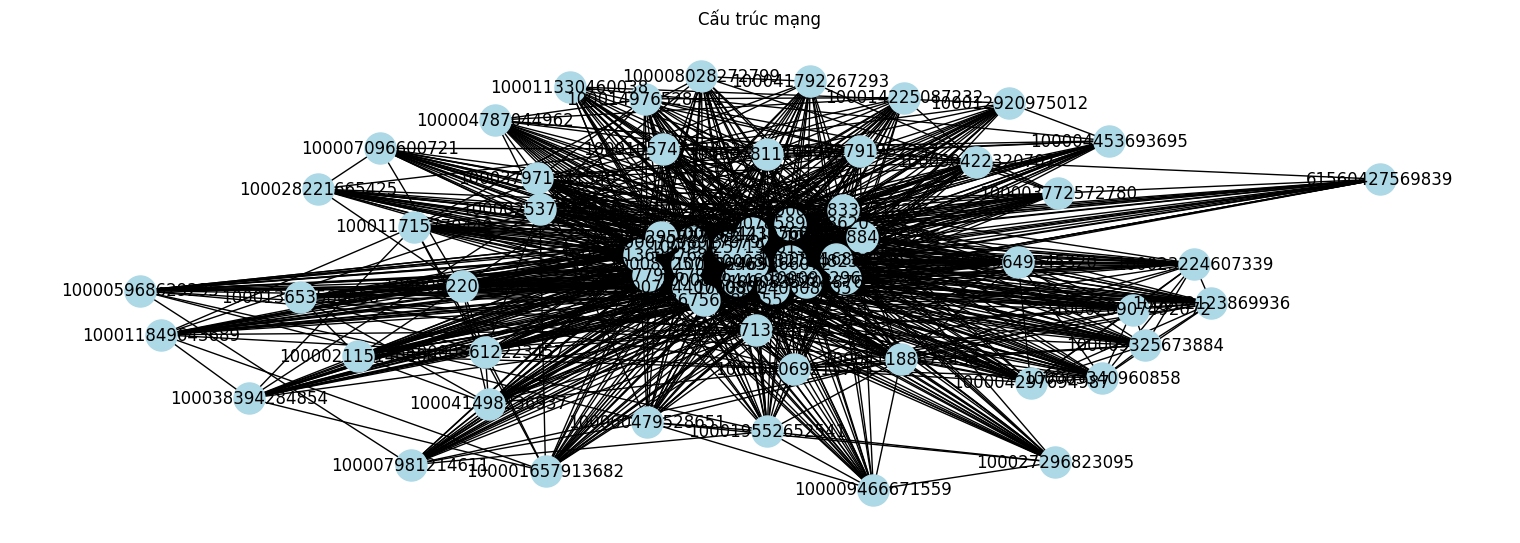

Train edges: 976
Test positive edges: 244
Test negative edges: 244

Bảng so sánh kết quả cho các phương pháp:
                    Method       AUC  Accuracy  Precision  Recall  F1-score
0         Common Neighbors  0.757600       0.5        0.5     1.0  0.666667
1      Jaccard Coefficient  0.427674       0.5        0.5     1.0  0.666667
2              Adamic-Adar  0.780435       0.5        0.5     1.0  0.666667
3  Preferential Attachment  0.826542       0.5        0.5     1.0  0.666667


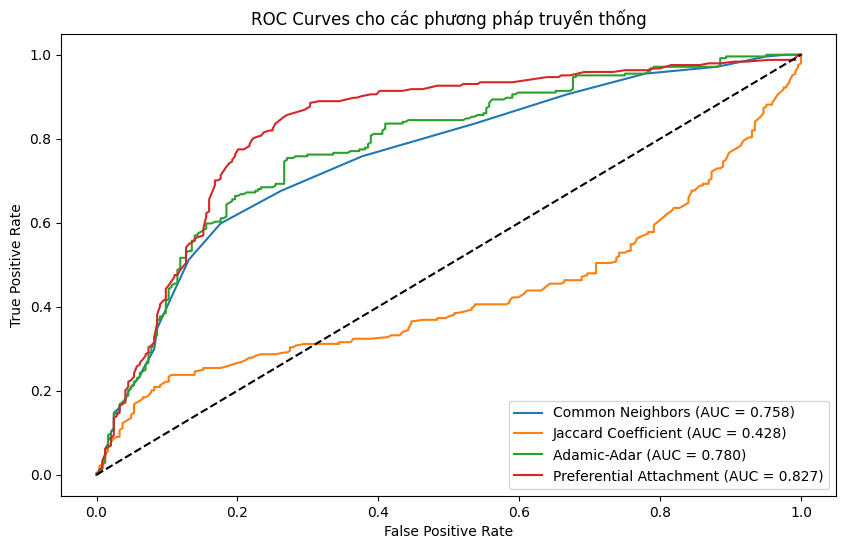


Kết quả AUC cho các phương pháp:
Common Neighbors: 0.758
Jaccard Coefficient: 0.428
Adamic-Adar: 0.780
Preferential Attachment: 0.827

Bảng kết quả mở rộng với Random Forest:
                    Method       AUC  Accuracy  Precision    Recall  F1-score
0         Common Neighbors  0.757600  0.500000   0.500000  1.000000  0.666667
1      Jaccard Coefficient  0.427674  0.500000   0.500000  1.000000  0.666667
2              Adamic-Adar  0.780435  0.500000   0.500000  1.000000  0.666667
3  Preferential Attachment  0.826542  0.500000   0.500000  1.000000  0.666667
4            Random Forest  0.811249  0.748299   0.791045  0.697368  0.741259


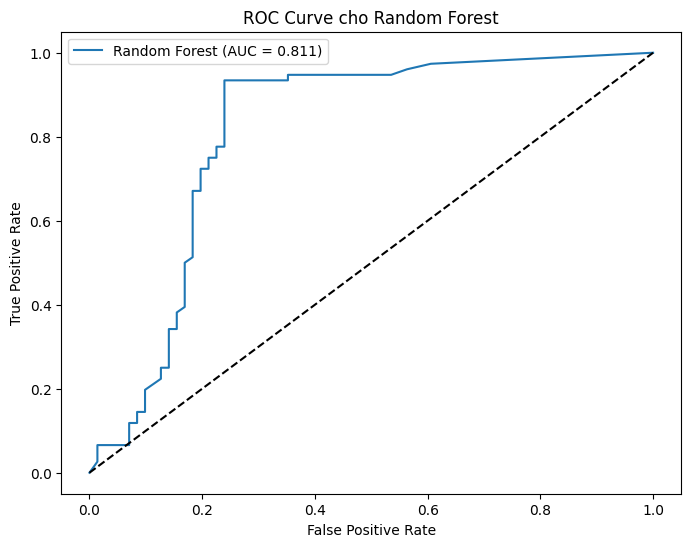

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

class LinkPrediction:
    def __init__(self, edges_file):
        """
        Khởi tạo với file edges đã cho.

        Parameters:
            edges_file (str): Đường dẫn đến file edges.
        """
        # Đọc dữ liệu từ file edges
        edges = pd.read_csv(edges_file)

        # Tạo đồ thị từ dữ liệu edges
        self.G = nx.Graph()
        for _, row in edges.iterrows():
            self.G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

    def analyze_network(self):
        """Phân tích cơ bản về mạng."""
        print("\n=== Phân tích mạng ===")
        print(f"Số node: {self.G.number_of_nodes()}")
        print(f"Số cạnh: {self.G.number_of_edges()}")
        print(f"Clustering trung bình: {nx.average_clustering(self.G):.3f}")

        plt.figure(figsize=(15, 5))
        pos = nx.spring_layout(self.G, seed=42)
        nx.draw(self.G, pos, with_labels=True, node_color='lightblue', node_size=500)
        plt.title("Cấu trúc mạng")
        plt.show()

    def prepare_data(self):
        """Chuẩn bị dữ liệu train và test."""
        edges = list(self.G.edges())
        np.random.seed(42)
        np.random.shuffle(edges)

        n_test = int(len(edges) * 0.2)
        self.test_edges = edges[:n_test]
        self.train_edges = edges[n_test:]

        self.train_G = self.G.copy()
        self.train_G.remove_edges_from(self.test_edges)

        non_edges = list(nx.non_edges(self.train_G))
        np.random.shuffle(non_edges)
        self.test_non_edges = non_edges[:n_test]
        print(f"Train edges: {len(self.train_edges)}")
        print(f"Test positive edges: {len(self.test_edges)}")
        print(f"Test negative edges: {len(self.test_non_edges)}")

    def extract_features(self, G, u, v):
        """Trích xuất features cho các node pairs."""
        cn = len(list(nx.common_neighbors(G, u, v)))
        jc = list(nx.jaccard_coefficient(G, [(u, v)]))[0][2]
        aa = list(nx.adamic_adar_index(G, [(u, v)]))[0][2]
        pa = list(nx.preferential_attachment(G, [(u, v)]))[0][2]
        return [cn, jc, aa, pa]

    def prepare_ml_data(self, G, positive_edges, negative_edges):
        """Tạo dữ liệu cho machine learning."""
        X = [self.extract_features(G, u, v) for u, v in positive_edges + negative_edges]
        y = [1] * len(positive_edges) + [0] * len(negative_edges)
        return np.array(X), np.array(y)

    def evaluate_ml(self):
        """Huấn luyện mô hình ML và đánh giá."""
        X, y = self.prepare_ml_data(self.train_G, self.test_edges, self.test_non_edges)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)

        # Tính các metric
        auc = roc_auc_score(y_test, y_pred_proba)
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Tạo DataFrame mới cho Random Forest
        rf_results = pd.DataFrame([{
            "Method": "Random Forest",
            "AUC": auc,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1
        }])

        # Concatenate với kết quả cũ
        self.results_df = pd.concat([self.results_df, rf_results], ignore_index=True)

        # Hiển thị bảng kết quả
        print("\nBảng kết quả mở rộng với Random Forest:")
        print(self.results_df)

        # Vẽ ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.3f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve cho Random Forest')
        plt.legend()
        plt.show()


    def evaluate_baselines(self):
        """Đánh giá các phương pháp truyền thống."""
        methods = {
            'Common Neighbors': lambda u, v: len(list(nx.common_neighbors(self.train_G, u, v))),
            'Jaccard Coefficient': lambda u, v: list(nx.jaccard_coefficient(self.train_G, [(u, v)]))[0][2],
            'Adamic-Adar': lambda u, v: list(nx.adamic_adar_index(self.train_G, [(u, v)]))[0][2],
            'Preferential Attachment': lambda u, v: list(nx.preferential_attachment(self.train_G, [(u, v)]))[0][2],
        }

        results = []

        for name, score_func in methods.items():
            # Tính điểm cho positive và negative edges
            pos_scores = [score_func(u, v) for u, v in self.test_edges]
            neg_scores = [score_func(u, v) for u, v in self.test_non_edges]

            # Tạo y_true và y_scores
            y_true = [1] * len(pos_scores) + [0] * len(neg_scores)
            y_scores = pos_scores + neg_scores
            y_pred = [1 if score > 0 else 0 for score in y_scores]  # Dự đoán nhị phân

            # Tính các metric
            auc = roc_auc_score(y_true, y_scores)
            acc = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred)
            recall = recall_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred)

            # Lưu kết quả
            results.append({
                "Method": name,
                "AUC": auc,
                "Accuracy": acc,
                "Precision": precision,
                "Recall": recall,
                "F1-score": f1
            })

        # Chuyển kết quả thành DataFrame
        self.results_df = pd.DataFrame(results)
        print("\nBảng so sánh kết quả cho các phương pháp:")
        print(self.results_df)

        # Vẽ ROC Curves
        plt.figure(figsize=(10, 6))
        for name, score_func in methods.items():
            pos_scores = [score_func(u, v) for u, v in self.test_edges]
            neg_scores = [score_func(u, v) for u, v in self.test_non_edges]

            y_true = [1] * len(pos_scores) + [0] * len(neg_scores)
            y_scores = pos_scores + neg_scores
            fpr, tpr, _ = roc_curve(y_true, y_scores)

            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_true, y_scores):.3f})")

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves cho các phương pháp truyền thống')
        plt.legend()
        plt.show()

        print("\nKết quả AUC cho các phương pháp:")
        # Sử dụng results_df thay vì results để in kết quả AUC
        for _, row in self.results_df.iterrows():
            print(f"{row['Method']}: {row['AUC']:.3f}")

    def run_experiment(self):
        """Chạy thử nghiệm hoàn chỉnh."""
        self.analyze_network()
        self.prepare_data()
        self.evaluate_baselines()
        self.evaluate_ml()

if __name__ == "__main__":
    edges_file = "/content/drive/MyDrive/dulieu/MangXaHoi/DoAnCuoiKy/edges.csv"
    lp = LinkPrediction(edges_file=edges_file)
    lp.run_experiment()



Phân tích từng phương pháp:

**Common Neighbors**: Phương pháp này có Recall cao nhưng Precision thấp, tức là nó dự đoán nhiều liên kết tiềm năng nhưng cũng tạo ra nhiều liên kết sai.

**Jaccard Coefficient**: AUC thấp cho thấy phương pháp này không hiệu quả trong việc phân biệt liên kết tồn tại và không tồn tại.

**Adamic-Adar**: Tốt hơn Common Neighbors nhờ AUC cao hơn, nhưng Precision vẫn thấp, chỉ phù hợp khi ưu tiên Recall.

**Preferential Attachment**: 0.826542 (cao nhất trong các phương pháp không dùng học máy). AUC cao nhất trong các phương pháp dựa trên hàng xóm, cho thấy khả năng phân biệt tốt nhất giữa liên kết tồn tại và không tồn tại.

**Random Forest**:
AUC: 0.811249 (rất cao, nhưng thấp hơn Preferential Attachment một chút).
Accuracy: 0.748299 (cao nhất).
Precision: 0.791045 (cao nhất).
Recall: 0.697368 (thấp hơn các phương pháp dựa trên hàng xóm).
F1-score: 0.741259 (cao nhất).

Nhận xét: Phương pháp này đạt F1-score cao nhất, đồng nghĩa với sự cân bằng giữa Precision và Recall. Ngoài ra, Accuracy cao nhất cho thấy nó dự đoán hiệu quả hơn

## sử dụng thêm file node


=== Phân tích mạng ===
Số node: 63
Số cạnh: 1220
Clustering trung bình: 0.861


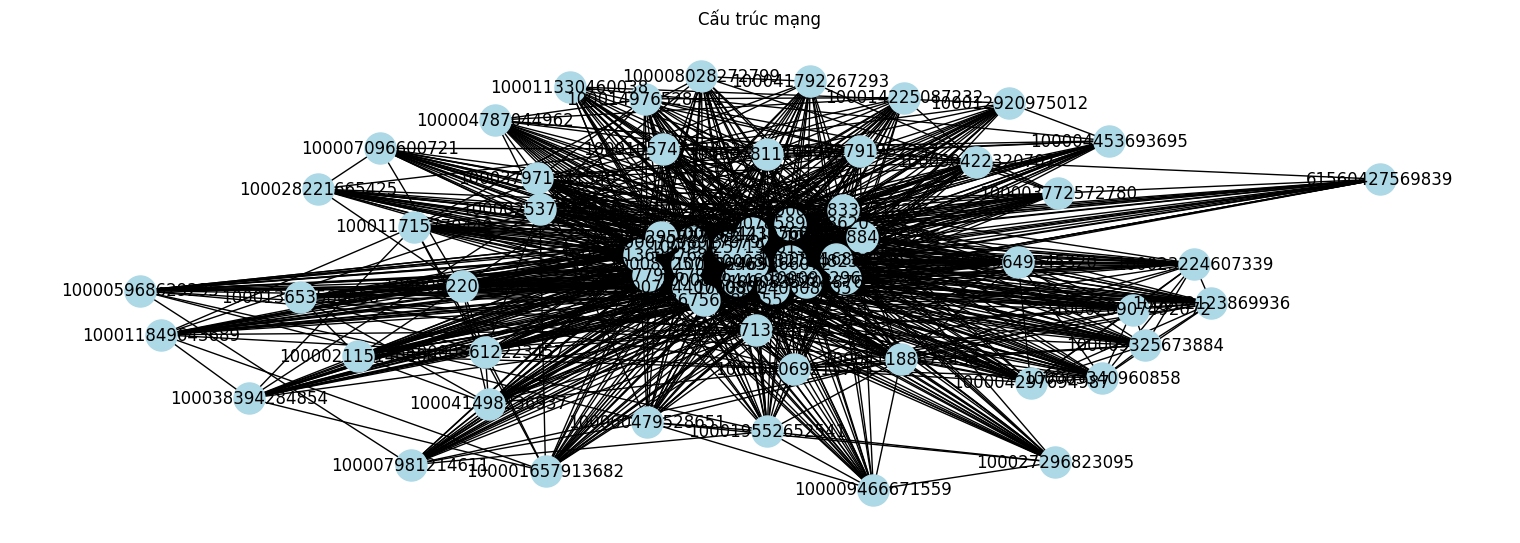

Train edges: 976
Test positive edges: 244
Test negative edges: 244

=== Kết quả đánh giá ===
AUC: 0.827
Accuracy: 0.755
Precision: 0.794
Recall: 0.711
F1-score: 0.750


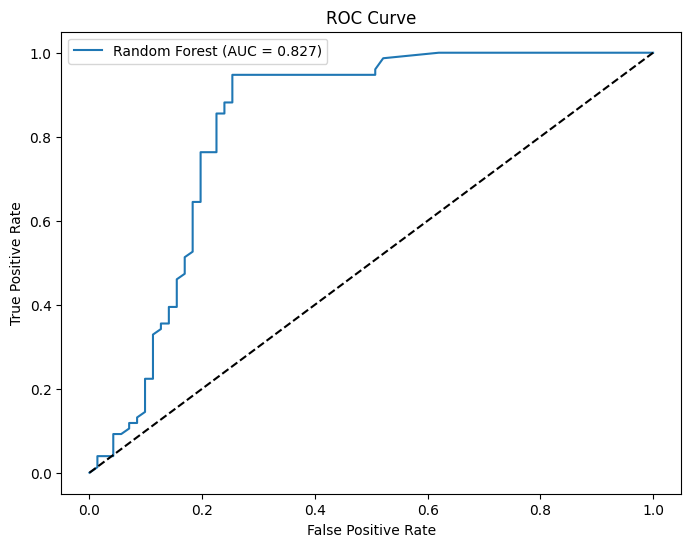

In [35]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score


class LinkPrediction:
    def __init__(self, edges_file, nodes_file):
        """
        Khởi tạo với file edges và file nodes đã cho.

        Parameters:
            edges_file (str): Đường dẫn đến file edges.
            nodes_file (str): Đường dẫn đến file nodes.
        """
        # Đọc dữ liệu từ file edges
        edges = pd.read_csv(edges_file)

        # Đọc dữ liệu từ file nodes
        nodes = pd.read_csv(nodes_file)
        self.node_features = nodes.set_index('ID').to_dict(orient='index')

        # Tạo đồ thị từ dữ liệu edges
        self.G = nx.Graph()
        for _, row in edges.iterrows():
            self.G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

        # Thêm đặc điểm từ nodes vào graph
        for node_id, features in self.node_features.items():
            if node_id in self.G.nodes:
                for attr, value in features.items():
                    self.G.nodes[node_id][attr] = value

    def analyze_network(self):
        """Phân tích cơ bản về mạng."""
        print("\n=== Phân tích mạng ===")
        print(f"Số node: {self.G.number_of_nodes()}")
        print(f"Số cạnh: {self.G.number_of_edges()}")
        print(f"Clustering trung bình: {nx.average_clustering(self.G):.3f}")

        plt.figure(figsize=(15, 5))
        pos = nx.spring_layout(self.G, seed=42)
        nx.draw(self.G, pos, with_labels=True, node_color='lightblue', node_size=500)
        plt.title("Cấu trúc mạng")
        plt.show()

    def prepare_data(self):
        """Chuẩn bị dữ liệu train và test."""
        edges = list(self.G.edges())
        np.random.seed(42)
        np.random.shuffle(edges)

        n_test = int(len(edges) * 0.2)
        self.test_edges = edges[:n_test]
        self.train_edges = edges[n_test:]

        self.train_G = self.G.copy()
        self.train_G.remove_edges_from(self.test_edges)

        non_edges = list(nx.non_edges(self.train_G))
        np.random.shuffle(non_edges)
        self.test_non_edges = non_edges[:n_test]
        print(f"Train edges: {len(self.train_edges)}")
        print(f"Test positive edges: {len(self.test_edges)}")
        print(f"Test negative edges: {len(self.test_non_edges)}")

    def extract_features(self, G, u, v):
        """Trích xuất features cho các node pairs."""
        cn = len(list(nx.common_neighbors(G, u, v)))
        jc = list(nx.jaccard_coefficient(G, [(u, v)]))[0][2]
        aa = list(nx.adamic_adar_index(G, [(u, v)]))[0][2]
        pa = list(nx.preferential_attachment(G, [(u, v)]))[0][2]

        # Lấy đặc điểm node
        u_features = self.node_features.get(u, {})
        v_features = self.node_features.get(v, {})

        # Kết hợp đặc điểm node
        combined_features = [
            u_features.get('Feature1', 0),
            v_features.get('Feature1', 0),
            abs(u_features.get('Feature1', 0) - v_features.get('Feature1', 0))
        ]

        return [cn, jc, aa, pa] + combined_features

    def prepare_ml_data(self, G, positive_edges, negative_edges):
        """Tạo dữ liệu cho machine learning."""
        X = [self.extract_features(G, u, v) for u, v in positive_edges + negative_edges]
        y = [1] * len(positive_edges) + [0] * len(negative_edges)
        return np.array(X), np.array(y)

    def evaluate_ml(self):
        """Huấn luyện mô hình ML và đánh giá."""
        X, y = self.prepare_ml_data(self.train_G, self.test_edges, self.test_non_edges)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)

        # Tính các metric
        auc = roc_auc_score(y_test, y_pred_proba)
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print("\n=== Kết quả đánh giá ===")
        print(f"AUC: {auc:.3f}")
        print(f"Accuracy: {acc:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1-score: {f1:.3f}")

        # Vẽ ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.3f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

    def run_experiment(self):
        """Chạy thử nghiệm hoàn chỉnh."""
        self.analyze_network()
        self.prepare_data()
        self.evaluate_ml()


if __name__ == "__main__":
    edges_file = "/content/drive/MyDrive/dulieu/MangXaHoi/DoAnCuoiKy/edges.csv"
    nodes_file = "/content/drive/MyDrive/dulieu/MangXaHoi/DoAnCuoiKy/nodes.csv"
    lp = LinkPrediction(edges_file=edges_file, nodes_file=nodes_file)
    lp.run_experiment()


##Dự đoán có bao nhiêu liên kết mới sẽ được hình thành

prepare_data:

Lưu giữ các non-edges còn lại (remaining_non_edges) để dự đoán các liên kết mới.
predict_new_links:

Dự đoán xác suất liên kết mới từ các non-edges còn lại.
Sử dụng một ngưỡng (threshold) để chọn các liên kết mới có xác suất cao.
Kết quả:

Hiển thị số lượng liên kết mới dự đoán được.
In ra danh sách các liên kết mới (giới hạn 10 liên kết đầu tiên).

In [36]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve


class LinkPrediction:
    def __init__(self, edges_file, nodes_file):
        # Đọc dữ liệu từ file edges
        edges = pd.read_csv(edges_file)

        # Đọc dữ liệu từ file nodes
        nodes = pd.read_csv(nodes_file)
        self.node_features = nodes.set_index('ID').to_dict(orient='index')

        # Tạo đồ thị từ dữ liệu edges
        self.G = nx.Graph()
        for _, row in edges.iterrows():
            self.G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

        # Thêm đặc điểm từ nodes vào graph
        for node_id, features in self.node_features.items():
            if node_id in self.G.nodes:
                for attr, value in features.items():
                    self.G.nodes[node_id][attr] = value

    def prepare_data(self):
        """Chuẩn bị dữ liệu train và test."""
        edges = list(self.G.edges())
        np.random.seed(42)
        np.random.shuffle(edges)

        n_test = int(len(edges) * 0.2)
        self.test_edges = edges[:n_test]
        self.train_edges = edges[n_test:]

        self.train_G = self.G.copy()
        self.train_G.remove_edges_from(self.test_edges)

        non_edges = list(nx.non_edges(self.train_G))
        np.random.shuffle(non_edges)
        self.test_non_edges = non_edges[:n_test]
        self.remaining_non_edges = non_edges[n_test:]  # Phần còn lại của non-edges
        print(f"Train edges: {len(self.train_edges)}")
        print(f"Test positive edges: {len(self.test_edges)}")
        print(f"Test negative edges: {len(self.test_non_edges)}")

    def extract_features(self, G, u, v):
        """Trích xuất features cho các node pairs."""
        cn = len(list(nx.common_neighbors(G, u, v)))
        jc = list(nx.jaccard_coefficient(G, [(u, v)]))[0][2]
        aa = list(nx.adamic_adar_index(G, [(u, v)]))[0][2]
        pa = list(nx.preferential_attachment(G, [(u, v)]))[0][2]

        # Lấy đặc điểm node
        u_features = self.node_features.get(u, {})
        v_features = self.node_features.get(v, {})

        # Kết hợp đặc điểm node
        combined_features = [
            u_features.get('Feature1', 0),
            v_features.get('Feature1', 0),
            abs(u_features.get('Feature1', 0) - v_features.get('Feature1', 0))
        ]

        return [cn, jc, aa, pa] + combined_features

    def prepare_ml_data(self, G, positive_edges, negative_edges):
        """Tạo dữ liệu cho machine learning."""
        X = [self.extract_features(G, u, v) for u, v in positive_edges + negative_edges]
        y = [1] * len(positive_edges) + [0] * len(negative_edges)
        return np.array(X), np.array(y)

    def predict_new_links(self, model, threshold=0.5):
        """Dự đoán các liên kết mới từ các non-edges còn lại."""
        X_remaining = [self.extract_features(self.train_G, u, v) for u, v in self.remaining_non_edges]
        probabilities = model.predict_proba(X_remaining)[:, 1]
        predicted_links = [(u, v) for (u, v), prob in zip(self.remaining_non_edges, probabilities) if prob >= threshold]

        print(f"Số lượng liên kết mới được dự đoán: {len(predicted_links)}")
        return predicted_links

    def evaluate_and_predict_links(self):
        """Huấn luyện mô hình ML và dự đoán các liên kết mới."""
        X, y = self.prepare_ml_data(self.train_G, self.test_edges, self.test_non_edges)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        # Đánh giá trên tập test
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
        print(f"AUC trên tập test: {auc:.3f}")

        # Dự đoán các liên kết mới
        new_links = self.predict_new_links(model)
        return new_links

    def run_experiment(self):
        """Chạy thử nghiệm hoàn chỉnh."""
        self.prepare_data()
        new_links = self.evaluate_and_predict_links()

        # Hiển thị các liên kết mới dự đoán
        print("\n=== Danh sách liên kết mới dự đoán ===")
        for u, v in new_links[:10]:  # Hiển thị 10 liên kết đầu tiên
            print(f"{u} - {v}")


if __name__ == "__main__":
    edges_file = "/content/drive/MyDrive/dulieu/MangXaHoi/DoAnCuoiKy/edges.csv"
    nodes_file = "/content/drive/MyDrive/dulieu/MangXaHoi/DoAnCuoiKy/nodes.csv"
    lp = LinkPrediction(edges_file=edges_file, nodes_file=nodes_file)
    lp.run_experiment()


Train edges: 976
Test positive edges: 244
Test negative edges: 244
AUC trên tập test: 0.827
Số lượng liên kết mới được dự đoán: 214

=== Danh sách liên kết mới dự đoán ===
100089441656893 - 100085040808935
100004297694987 - 100006069215765
100008220900883 - 100080327048230
100041792267293 - 100089441656893
100001884645265 - 100081944692856
100010574713732 - 100082469666072
100083520887636 - 100007811195773
100086136287688 - 100081944692856
61560427569839 - 100083520887636
100014976528411 - 100083520887636
